In [34]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils
import torch
import matplotlib.pyplot as plt
import numpy
from model_ae import *
from model_GAN import * 


ngpu = 1
nz = 100 # size of latent variable
ngf = 64 
ndf = 64 
nef = 16
np = 4
width = 25 # width = nz / np
imageSize = 64
batchSize = 16


dataset = datasets.MNIST(root="~/datasets/", download=True,
                        transform=transforms.Compose([
                            transforms.Resize(imageSize),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5,), (0.5,)),
                        ]))
nc = 1
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batchSize,
                                         shuffle=True, num_workers=2)

In [60]:
netE = Encoder(ngpu, nz, nef, nc)
netG = Generator(ngpu, nz, ngf, nc)


netE.load_state_dict(torch.load("./trained_model/final_netE.pth"))
netG.load_state_dict(torch.load("./trained_model/final_netG.pth"))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


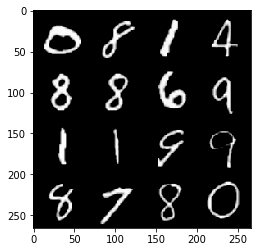

In [46]:
(ground_truth, y) = next(iter(dataloader))
image = vutils.make_grid(ground_truth, nrow=4).numpy()
plt.imshow(numpy.transpose(image, (1, 2, 0)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


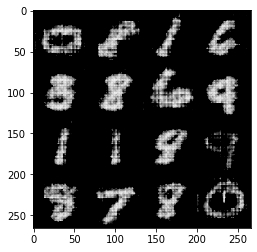

In [47]:
latent = netE(ground_truth)
reconstructed = netG(latent)
image = vutils.make_grid(reconstructed.detach(), nrow=4).numpy()
plt.imshow(numpy.transpose(image, (1, 2, 0)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


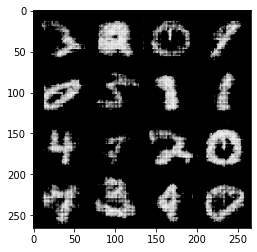

In [48]:
noise = torch.randn(batchSize, nz, 1, 1)
fake = netG(noise)
image = vutils.make_grid(fake.detach(), nrow=4).numpy()
plt.imshow(numpy.transpose(image, (1, 2, 0)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


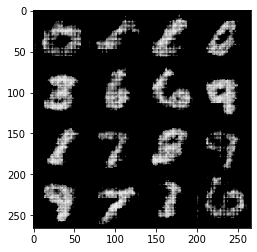

In [49]:
interpolated_latent = latent.clone()
interpolated_latent[:, 0:width] = noise[:, 0:width]
interpolated_fake = netG(interpolated_latent)
image = vutils.make_grid(interpolated_fake.detach(), nrow=4).numpy()
plt.imshow(numpy.transpose(image, (1, 2, 0)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


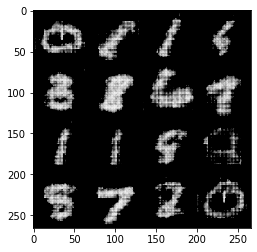

In [50]:
interpolated_latent = latent.clone()
interpolated_latent[:, width:2*width] = noise[:, 0:width]
interpolated_fake = netG(interpolated_latent)
image = vutils.make_grid(interpolated_fake.detach(), nrow=4).numpy()
plt.imshow(numpy.transpose(image, (1, 2, 0)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


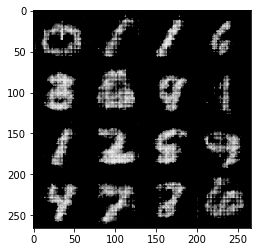

In [52]:
interpolated_latent = latent.clone()
#跨越了block
interpolated_latent[:, width-10:2*width-10] = noise[:, 0:width]
interpolated_fake = netG(interpolated_latent)
image = vutils.make_grid(interpolated_fake.detach(), nrow=4).numpy()
plt.imshow(numpy.transpose(image, (1, 2, 0)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


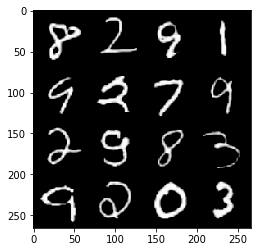

In [55]:
(ground_truth_2, y) = next(iter(dataloader))
image = vutils.make_grid(ground_truth_2, nrow=4).numpy()
plt.imshow(numpy.transpose(image, (1, 2, 0)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


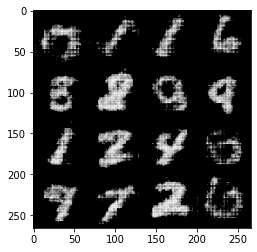

In [56]:
latent_2 = netE(ground_truth_2)
interpolated_latent = latent.clone()
interpolated_latent[:, 0:width] = latent_2[:, 0:width]
interpolated_fake = netG(interpolated_latent)
image = vutils.make_grid(interpolated_fake.detach(), nrow=4).numpy()
plt.imshow(numpy.transpose(image, (1, 2, 0)))
plt.show()